# Scientific Computing with Python (Second Edition)

# Chapter 08

*We start by importing all from Numpy. As explained in Chapter 01 the examples are written assuming this import is initially done.*

In [1]:
from numpy import *

## 8.1 Introduction to classes
### 8.1.1 A guiding example: Rational numbers
*no code*
### 8.1.2 Defining a class and making an instance

In [2]:
class RationalNumber: 
      pass

In [3]:
r = RationalNumber()

In [4]:
type(r)

__main__.RationalNumber

In [5]:
if isinstance(r, RationalNumber):
    print('Indeed, it belongs to the class RationalNumber')  

Indeed, it belongs to the class RationalNumber


### 8.1.3 The `__init__` method

In [6]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator

In [7]:
q = RationalNumber(10, 20)    # Defines a new object
q.numerator                   # returns 10

10

In [8]:
q.denominator                 # returns 20

20

In [9]:
q = RationalNumber(3, 5) # instantiation
q.numerator              # attribute access
q.denominator

a = array([1, 2])        # instantiation
a.shape

z = 5 + 4j               # instantiation
z.imag

4.0

In [10]:
q = RationalNumber(3, 5) 
r = RationalNumber(7, 3)
q.numerator = 17
del r.denominator

In [11]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)    

In [12]:
q = RationalNumber(10, 20)    # Defines a new object
q.convert2float() # returns 0.5  

0.5

In [13]:
RationalNumber.convert2float(q)

0.5

### 8.1.5 Special methods

In [14]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'

In [15]:
q = RationalNumber(10, 20)    # Defines a new object
print(q)

10 / 20


In [16]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    def add(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)

In [17]:
q = RationalNumber(1, 2)
p = RationalNumber(1, 3)
q.add(p)   # returns the RationalNumber for 5/6

5 / 6

*We add now to the class all special methods discussed in the book directly:*

In [18]:
class RationalNumber:
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
    def convert2float(self):
        return float(self.numerator) / float(self.denominator)  
    def __repr__(self): 
        return f'{self.numerator} / {self.denominator}'
    def __add__(self, other): 
        p1, q1 = self.numerator, self.denominator 
        if isinstance(other, int):        
            p2, q2 = other, 1 
        else: 
            p2, q2 = other.numerator, other.denominator 
        return RationalNumber(p1 * q2 + p2 * q1, q1 * q2)
    def __eq__(self, other):
        return self.denominator * other.numerator == \
            self.numerator * other.denominator
    def __radd__(self, other):
        return self + other

In [19]:
p = RationalNumber(1, 2) # instantiation
q = RationalNumber(2, 4) # instantiation
p == q # True

True

In [20]:
q = RationalNumber(1, 2)
p = RationalNumber(1, 3)
q + p # RationalNumber(5, 6)

5 / 6

In [21]:
p+5

16 / 3

In [22]:
5+p

16 / 3

In [23]:
import itertools

class  Recursion3Term:
    def __init__(self, a0, a1, u0, u1):
        self.coeff = [a1, a0]
        self.initial = [u1, u0]
    def __iter__(self):
        u1, u0 = self.initial
        yield u0  # (see also Iterators section in Chapter 9) 
        yield u1
        a1, a0 = self.coeff
        while True :
            u1, u0 = a1 * u1 + a0 * u0, u1
            yield u1
    def __getitem__(self, k):
        return list(itertools.islice(self, k, k + 1))[0]

In [24]:
r3 = Recursion3Term(-0.35, 1.2, 1, 1)
for i, r in enumerate(r3):
    if i == 7:
        print(r)  # returns 0.194167
        break

0.194167


In [25]:
r3[7] # returns 0.194167

0.194167

## 8.2 Attributes that depend on each other

In [26]:
class Triangle:
    def __init__(self,  A, B, C):
        self.A = array(A)
        self.B = array(B)
        self.C = array(C)
        self.a = self.C - self.B
        self.b = self.C - self.A
        self.c = self.B - self.A
    def area(self):
        return abs(cross(self.b, self.c)) / 2

In [27]:
tr = Triangle([0., 0.], [1., 0.], [0., 1.])

In [28]:
tr.area() # returns 0.5

0.5

In [29]:
tr.B = [12., 0.]
tr.area() # still returns 0.5, should be 6 instead.

0.5

### 8.2.1 The function `property`

In [30]:
class Triangle:
    def __init__(self, A, B, C):
        self._A = array(A)
        self._B = array(B)
        self._C = array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(cross(self._c, self._b)) / 2.
    def set_B(self, B):
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
    def get_B(self):
        return self._B
    def del_Pt(self):
        raise Exception('A triangle point cannot be deleted')
    B = property(fget = get_B, fset = set_B, fdel = del_Pt)

In [31]:
tr = Triangle([0., 0.], [1., 0.], [0., 1.])
tr.B = [12., 0.]
tr.area() # returns 6.0

6.0

## 8.3 Bound and unbound methods

In [32]:
class A:
    def func(self,arg):
        pass

In [33]:
A.func  # <unbound method A.func>
instA = A()  # we create an instance
instA.func  #  <bound method A.func of ... >

<bound method A.func of <__main__.A object at 0x7f7848cf7c50>>

## 8.4 Class attributes and class methods
### 8.4.1 Class attributes

In [34]:
class Newton:
    tol = 1e-8 # this is a class attribute
    def __init__(self,f):
        self.f = f # this is not a class attribute
    ...

In [35]:
f = lambda x: x**2
g = lambda x: 3*x
N1 = Newton(f)
N2 = Newton(g)

In [36]:
N1.tol # 1e-8
N2.tol # 1e-8

1e-08

In [37]:
Newton.tol = 1e-10
N1.tol # 1e-10
N2.tol # 1e-10

1e-10

In [38]:
N2.tol = 1.e-4
N1.tol  # still 1.e-10

1e-10

In [39]:
Newton.tol = 1e-5 
# now all instances of the Newton classes have tol=1e-5
N1.tol # 1.e-5
N2.tol # 1.e-4 
# N2.tol is now detached and therefore not altered

0.0001

### 8.4.2 Class methods

In [40]:
class Polynomial:
    def __init__(self, coeff):
        self.coeff = array(coeff)
    @classmethod
    def by_points(cls, x, y):
        degree = x.shape[0] - 1
        coeff = polyfit(x, y, degree)
        return cls(coeff) 
    def __eq__(self, other):
        return allclose(self.coeff, other.coeff)

In [41]:
p1 = Polynomial.by_points(array([0., 1.]), array([0., 1.]))
p2 = Polynomial([1., 0.])

print(p1 == p2)  # prints True

True


## 8.5 Subclasses and inheritance


In [42]:
import matplotlib.pyplot as mp

class OneStepMethod:
    def __init__(self, f, x0, interval, N):
        self.f = f
        self.x0 = x0
        self.interval = [t0, te] = interval
        self.grid = linspace(t0, te, N)
        self.h = (te - t0) / N

    def generate(self):
        ti, ui = self.grid[0], self.x0
        yield ti, ui
        for t in self.grid[1:]:
            ui = ui + self.h * self.step(self.f, ui, ti)
            ti = t
            yield ti, ui

    def solve(self):
        self.solution = array(list(self.generate()))

    def plot(self):
        mp.plot(self.solution[:, 0], self.solution[:, 1])

    def step(self, f, u, t):
        raise NotImplementedError()

In [43]:
class ExplicitEuler(OneStepMethod):
    def step(self, f, u, t):
        return f(u, t)

class MidPointRule(OneStepMethod):
    def step(self, f, u, t):
        return f(u + self.h / 2 * f(u, t), t + self.h / 2)

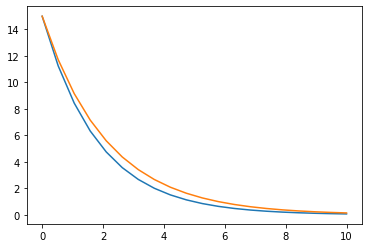

In [44]:
def f(x, t):
    return -0.5 * x

euler = ExplicitEuler(f, 15., [0., 10.], 20)
euler.solve()
euler.plot()
midpoint = MidPointRule(f, 15., [0., 10.], 20)

midpoint.solve()
midpoint.plot()

In [45]:
argument_list = [f, 15., [0., 10.], 20]
euler = ExplicitEuler(*argument_list)
midpoint = MidPointRule(*argument_list)

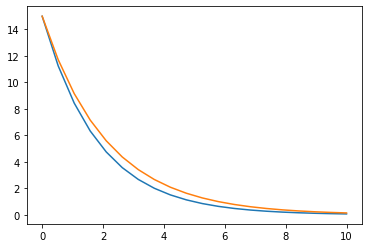

In [46]:
euler = ExplicitEuler(f, 15., [0., 10.], 20)
euler.solve()
euler.plot()
midpoint = MidPointRule(f, 15., [0., 10.], 20)

midpoint.solve()
midpoint.plot()

In [47]:
class ExplicitEuler(OneStepMethod):
    def __init__(self,*args, **kwargs):
        self.name='Explicit Euler Method'
        super(ExplicitEuler, self).__init__(*args,**kwargs)
    def step(self, f, u, t):
        return f(u, t)

## 8.6 Encapsulation

In [48]:
class Function:
    def __init__(self, f):
        self.f = f
    def __call__(self, x):
        return self.f(x)
    def __add__(self, g):
        def sum(x):
            return self(x) + g(x)
        return type(self)(sum) 
    def __mul__(self, g): 
        def prod(x):
            return self.f(x) * g(x)
        return type(self)(prod)
    def __radd__(self, g):
        return self + g
    def __rmul__(self, g):
        return self * g

In [49]:
T5 = Function(lambda x: cos(5 * arccos(x)))
T6 = Function(lambda x: cos(6 * arccos(x)))

In [50]:
import scipy.integrate as sci

weight = Function(lambda x: 1 / sqrt((1 - x ** 2)))
[integral, errorestimate] = \
        sci.quad(weight * T5 * T6, -1, 1) # (6.510878470473995e-17, 1.3237018925525037e-14)
integral

6.510878470473995e-17

## 8.7 Classes as decorators

In [51]:
class echo:
    text = 'Input parameters of {name}\n'+\
        'Positional parameters {args}\n'+\
        'Keyword parameters {kwargs}\n'
    def __init__(self, f):
        self.f = f
    def __call__(self, *args, **kwargs):
        print(self.text.format(name = self.f.__name__,
              args = args, kwargs = kwargs))
        return self.f(*args, **kwargs)

In [52]:
@echo
def line(m, b, x):
    return m * x + b

In [53]:
line(2., 5., 3.)

Input parameters of line
Positional parameters (2.0, 5.0, 3.0)
Keyword parameters {}



11.0

In [54]:
line(2., 5., x=3.)

Input parameters of line
Positional parameters (2.0, 5.0)
Keyword parameters {'x': 3.0}



11.0

In [55]:
class CountCalls:
    """
    Decorator that keeps track of the number of times 
    a function is called.
    """
    instances = {} 
    def __init__(self, f):
        self.f = f
        self.numcalls = 0
        self.instances[f] = self
    def __call__(self, *args, **kwargs):
        self.numcalls += 1
        return self.f(*args, **kwargs)
    @classmethod
    def counts(cls):
        """
        Return a dict of {function: # of calls} for all 
        registered functions.
        """
        return dict([(f.__name__, cls.instances[f].numcalls) 
                                    for f in cls.instances])

In [56]:
@CountCalls
def line(m, b, x):
    return m * x + b
@CountCalls 
def parabola(a, b, c, x):
    return a * x ** 2 + b * x + c
line(3., -1., 1.)
parabola(4., 5., -1., 2.)
 
CountCalls.counts() # returns {'line': 1, 'parabola': 1}

{'line': 1, 'parabola': 1}

In [57]:
parabola.numcalls # returns 1

1